<a href="https://colab.research.google.com/github/azizamirsaidova/abstractive_text_summarization/blob/main/Fine_tune_simplet5_absractive_text_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rouge
!pip install tf-estimator-nightly==2.8.0.dev2021122109
!pip install folium==0.2.1
!pip install simplet5 -q

# from google.colab import drive
# drive.mount('/content/gdrive')
import numpy as np 
import pandas as pd 
import nltk
from random import sample
import torch
torch.cuda.empty_cache()
import os
import torch
import json 
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config
from random import sample
from rouge import Rouge

DEPRECATION: pytorch-lightning 1.5.10 has a non-standard dependency specifier torch>=1.7.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pytorch-lightning 1.5.10 has a non-standard dependency specifier torch>=1.7.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pytorch-lightning 1.5.10 has a non-standard dependency specifier torch>=1.7.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the aut

/Users/manishadamera/Desktop/manisha_nlp/myenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#path = '/content/gdrive/MyDrive/train.csv'
path = 'train.csv'
trainning_df = pd.read_csv(path, engine='python')

MAX_LEN = 512
SUMMARY_LEN = 150
TRAINNING_SIZE = 100

trainning_df = trainning_df.iloc[0:TRAINNING_SIZE,:].copy()
trainning_article_ls = list(trainning_df['article'])
trainning_highlight_ls = list(trainning_df['highlights'])


In [4]:
for index in sample(list(np.arange(len(trainning_article_ls))),3):
    print('Original Text : ')
    print(trainning_article_ls[index])

    print('\n\nSummary Text : ')
    print(trainning_highlight_ls[index])
    
    print('===========================================================================================================\n\n')

Original Text : 
(CNN) -- Ralph Mata was an internal affairs lieutenant for the Miami-Dade Police Department, working in the division that investigates allegations of wrongdoing by cops. Outside the office, authorities allege that the 45-year-old longtime officer worked with a drug trafficking organization to help plan a murder plot and get guns. A criminal complaint unsealed in U.S. District Court in New Jersey Tuesday accuses Mata, also known as "The Milk Man," of using his role as a police officer to help the drug trafficking organization in exchange for money and gifts, including a Rolex watch. In one instance, the complaint alleges, Mata arranged to pay two assassins to kill rival drug dealers. The killers would pose as cops, pulling over their targets before shooting them, according to the complaint. "Ultimately, the (organization) decided not to move forward with the murder plot, but Mata still received a payment for setting up the meetings," federal prosecutors said in a statem

In [5]:
df = pd.DataFrame(columns=['target_text','source_text'])
df['target_text'] = trainning_highlight_ls
df['source_text'] = ['summarize: '+item for item in trainning_article_ls]

In [6]:
df.head()

,target_text,source_text
0,"Bishop John Folda, of North Dakota, is taking ...",summarize: By . Associated Press . PUBLISHED: ...
1,Criminal complaint: Cop used his role to help ...,summarize: (CNN) -- Ralph Mata was an internal...
2,"Craig Eccleston-Todd, 27, had drunk at least t...",summarize: A drunk driver who killed a young w...
3,Nina dos Santos says Europe must be ready to a...,summarize: (CNN) -- With a breezy sweep of his...
4,Fleetwood top of League One after 2-0 win at S...,summarize: Fleetwood are the only team still t...


In [7]:
len(df)

100

In [63]:
"""
from simplet5 import SimpleT5

model = SimpleT5()
model.from_pretrained(model_type="t5", model_name="t5-base")
MAX_EPOCHS = 10

torch.cuda.memory_summary(device=None, abbreviated=False)
torch.utils.checkpoint

model.train(train_df=df[0:(int)(0.7*TRAINNING_SIZE)],
            eval_df=df[(int)(0.7*TRAINNING_SIZE):TRAINNING_SIZE], 
            source_max_token_len=MAX_LEN, 
            target_max_token_len=SUMMARY_LEN, 
            batch_size=4, max_epochs=MAX_EPOCHS, use_gpu=True)
            
model_path = ''
rootdir = 'outputs/'
for it in os.scandir(rootdir):
    if it.is_dir():
        if 'simplet5-epoch-'+(str)(MAX_EPOCHS-1) in it.path:
            model_path = it.path
            print(model_path)

model.load_model("t5","./"+model_path, use_gpu=True)"""

'\nfrom simplet5 import SimpleT5\n\nmodel = SimpleT5()\nmodel.from_pretrained(model_type="t5", model_name="t5-base")\nMAX_EPOCHS = 10\n\ntorch.cuda.memory_summary(device=None, abbreviated=False)\ntorch.utils.checkpoint\n\nmodel.train(train_df=df[0:(int)(0.7*TRAINNING_SIZE)],\n            eval_df=df[(int)(0.7*TRAINNING_SIZE):TRAINNING_SIZE], \n            source_max_token_len=MAX_LEN, \n            target_max_token_len=SUMMARY_LEN, \n            batch_size=4, max_epochs=MAX_EPOCHS, use_gpu=True)\n            \nmodel_path = \'\'\nrootdir = \'outputs/\'\nfor it in os.scandir(rootdir):\n    if it.is_dir():\n        if \'simplet5-epoch-\'+(str)(MAX_EPOCHS-1) in it.path:\n            model_path = it.path\n            print(model_path)\n\nmodel.load_model("t5","./"+model_path, use_gpu=True)'

In [8]:
TRAINNING_SIZE = len(df)
train_df = df[:int(0.7 * TRAINNING_SIZE)]
eval_df = df[int(0.7 * TRAINNING_SIZE):]
print(train_df.shape, eval_df.shape)


(70, 2) (30, 2)


In [9]:
from simplet5 import SimpleT5
import os

model = SimpleT5()
model.from_pretrained(model_type="t5", model_name="t5-base")
MAX_EPOCHS = 10

# Assuming df, TRAINNING_SIZE, MAX_LEN, and SUMMARY_LEN are defined elsewhere in your code

model.train(train_df=df[0:(int)(0.7*TRAINNING_SIZE)],
            eval_df=df[(int)(0.7*TRAINNING_SIZE):TRAINNING_SIZE], 
            source_max_token_len=MAX_LEN, 
            target_max_token_len=SUMMARY_LEN, 
            batch_size=1, max_epochs=MAX_EPOCHS, use_gpu=False)
            
model_path = ''
rootdir = 'outputs/'
for it in os.scandir(rootdir):
    if it.is_dir():
        if 'simplet5-epoch-'+str(MAX_EPOCHS-1) in it.path:
            model_path = it.path
            print(model_path)

model.load_model("t5", "./"+model_path, use_gpu=False)

Global seed set to 42
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.614   Total estimated model params size (MB)


Validation sanity check:   0%|          | 0/2 [00:00<?, ?it/s]

/Users/manishadamera/Desktop/manisha_nlp/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
Global seed set to 42
Global seed set to 42
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the for

Global seed set to 42
/Users/manishadamera/Desktop/manisha_nlp/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 0:   0%|          | 0/100 [00:00<?, ?it/s] 

Global seed set to 42
Global seed set to 42
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch 0:  70%|███████   | 70/100 [05:51<02:30,  5.03s/it, loss=1.81, v_num=6, train_loss_step=1.410]

Global seed set to 42
Global seed set to 42
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch 1:   0%|          | 0/100 [00:00<?, ?it/s, loss=1.81, v_num=6, train_loss_step=1.410, val_loss_step=3.380, val_loss_epoch=1.900, train_loss_epoch=1.790]          

Global seed set to 42
Global seed set to 42
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch 1:  70%|███████   | 70/100 [05:36<02:24,  4.81s/it, loss=1.25, v_num=6, train_loss_step=1.380, val_loss_step=3.380, val_loss_epoch=1.900, train_loss_epoch=1.790] 

Global seed set to 42
Global seed set to 42
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch 2:   0%|          | 0/100 [00:00<?, ?it/s, loss=1.25, v_num=6, train_loss_step=1.380, val_loss_step=3.390, val_loss_epoch=1.710, train_loss_epoch=1.200]          

Global seed set to 42
Global seed set to 42
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch 2:  70%|███████   | 70/100 [05:49<02:29,  4.99s/it, loss=1.06, v_num=6, train_loss_step=2.480, val_loss_step=3.390, val_loss_epoch=1.710, train_loss_epoch=1.200] 

Global seed set to 42
Global seed set to 42
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch 3:   0%|          | 0/100 [00:00<?, ?it/s, loss=1.06, v_num=6, train_loss_step=2.480, val_loss_step=3.410, val_loss_epoch=1.770, train_loss_epoch=0.865]          

Global seed set to 42
Global seed set to 42
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch 3:  70%|███████   | 70/100 [06:10<02:38,  5.30s/it, loss=0.772, v_num=6, train_loss_step=1.060, val_loss_step=3.410, val_loss_epoch=1.770, train_loss_epoch=0.865] 

Global seed set to 42
Global seed set to 42
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch 4:   0%|          | 0/100 [00:00<?, ?it/s, loss=0.772, v_num=6, train_loss_step=1.060, val_loss_step=3.530, val_loss_epoch=1.860, train_loss_epoch=0.630]          

Global seed set to 42
Global seed set to 42
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch 4:  70%|███████   | 70/100 [06:05<02:36,  5.22s/it, loss=0.451, v_num=6, train_loss_step=0.313, val_loss_step=3.530, val_loss_epoch=1.860, train_loss_epoch=0.630] 

Global seed set to 42
Global seed set to 42
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch 5:   0%|          | 0/100 [00:00<?, ?it/s, loss=0.451, v_num=6, train_loss_step=0.313, val_loss_step=3.750, val_loss_epoch=1.940, train_loss_epoch=0.483]          

Global seed set to 42
Global seed set to 42
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch 5:  70%|███████   | 70/100 [05:50<02:30,  5.01s/it, loss=0.431, v_num=6, train_loss_step=0.240, val_loss_step=3.750, val_loss_epoch=1.940, train_loss_epoch=0.483]

Global seed set to 42
Global seed set to 42
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch 6:   0%|          | 0/100 [00:00<?, ?it/s, loss=0.431, v_num=6, train_loss_step=0.240, val_loss_step=3.890, val_loss_epoch=2.110, train_loss_epoch=0.374]          

Global seed set to 42
Global seed set to 42
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch 6:  70%|███████   | 70/100 [05:47<02:28,  4.96s/it, loss=0.27, v_num=6, train_loss_step=0.264, val_loss_step=3.890, val_loss_epoch=2.110, train_loss_epoch=0.374]  

Global seed set to 42
Global seed set to 42
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch 7:   0%|          | 0/100 [00:00<?, ?it/s, loss=0.27, v_num=6, train_loss_step=0.264, val_loss_step=4.000, val_loss_epoch=2.200, train_loss_epoch=0.275]          

Global seed set to 42
Global seed set to 42
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch 7:  70%|███████   | 70/100 [06:13<02:40,  5.34s/it, loss=0.195, v_num=6, train_loss_step=0.171, val_loss_step=4.000, val_loss_epoch=2.200, train_loss_epoch=0.275] 

Global seed set to 42
Global seed set to 42
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch 8:   0%|          | 0/100 [00:00<?, ?it/s, loss=0.195, v_num=6, train_loss_step=0.171, val_loss_step=4.130, val_loss_epoch=2.240, train_loss_epoch=0.220]          

Global seed set to 42
Global seed set to 42
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch 8:  70%|███████   | 70/100 [06:04<02:36,  5.21s/it, loss=0.147, v_num=6, train_loss_step=0.00849, val_loss_step=4.130, val_loss_epoch=2.240, train_loss_epoch=0.220]

Global seed set to 42
Global seed set to 42
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch 9:   0%|          | 0/100 [00:00<?, ?it/s, loss=0.147, v_num=6, train_loss_step=0.00849, val_loss_step=4.160, val_loss_epoch=2.290, train_loss_epoch=0.193]          

Global seed set to 42
Global seed set to 42
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch 9:  70%|███████   | 70/100 [05:35<02:23,  4.79s/it, loss=0.114, v_num=6, train_loss_step=0.516, val_loss_step=4.160, val_loss_epoch=2.290, train_loss_epoch=0.193] 

Global seed set to 42
Global seed set to 42
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch 9: 100%|██████████| 100/100 [06:34<00:00,  3.94s/it, loss=0.114, v_num=6, train_loss_step=0.516, val_loss_step=4.580, val_loss_epoch=2.310, train_loss_epoch=0.165]
outputs/simplet5-epoch-9-train-loss-0.165-val-loss-2.3113


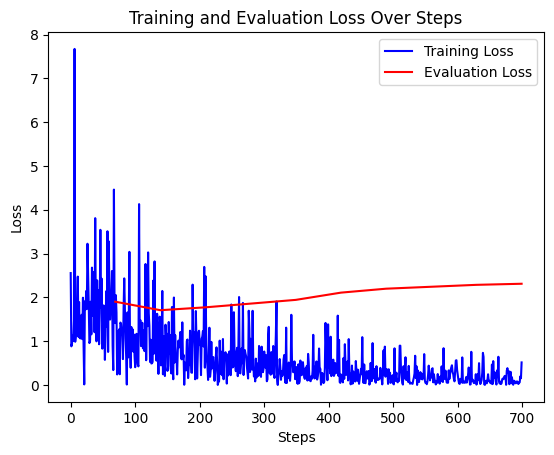

In [11]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import os

log_dir = 'lightning_logs/'
ea = event_accumulator.EventAccumulator(os.path.join(log_dir, os.listdir(log_dir)[0]))
ea.Reload()

# Extract training loss data
training_loss = ea.scalars.Items('train_loss_step')
# Extract evaluation loss data
evaluation_loss = ea.scalars.Items('val_loss_epoch')  # Replace 'val_loss_step' with your actual tag for evaluation loss

# Extract values for plotting
steps_train = [x.step for x in training_loss]  # Steps for training loss
train_losses = [x.value for x in training_loss]

steps_eval = [x.step for x in evaluation_loss]  # Steps for evaluation loss
eval_losses = [x.value for x in evaluation_loss]

# Plotting
plt.plot(steps_train, train_losses, label='Training Loss', color='blue')
plt.plot(steps_eval, eval_losses, label='Evaluation Loss', color='red')  # Using a different color for evaluation loss
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training and Evaluation Loss Over Steps')
plt.legend()
plt.show()

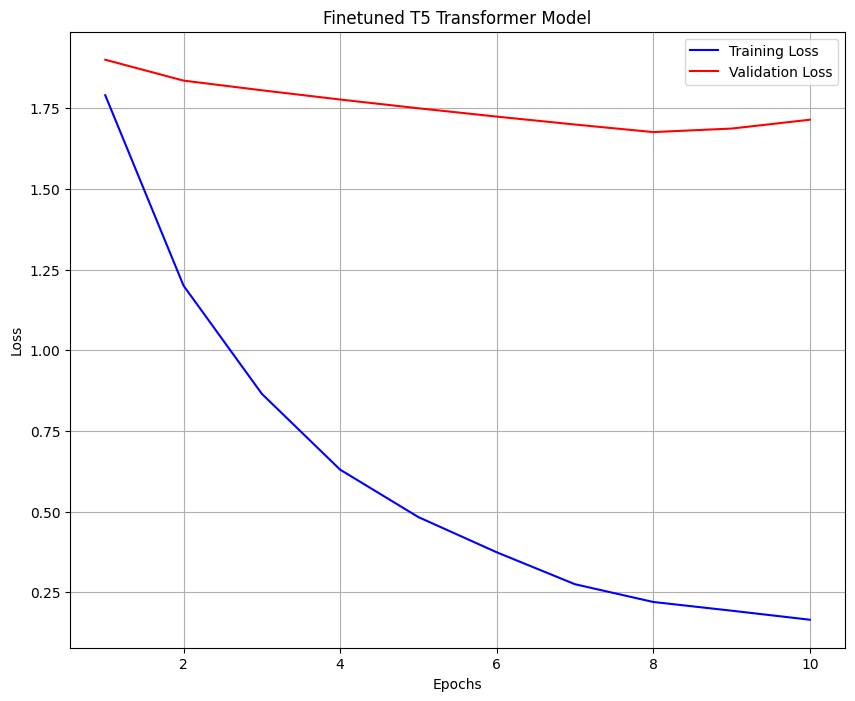

In [26]:
import matplotlib.pyplot as plt


epochs = list(range(1, 11))  # Replace with your actual epochs

# Create the plot
plt.figure(figsize=(10,8))
plt.plot(epochs, training_loss, label='Training Loss', color='blue')
plt.plot(epochs, validation_loss, label='Validation Loss', color='red')
plt.title('Finetuned T5 Transformer Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)  # Added grid for better readability, as seen in your uploaded image
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Replace these lists with your actual values
#training_loss = [1.81, 1.25, 1.06, 0.772, 0.451, 0.431, 0.27, 0.195, 0.147, 0.114]
training_loss = [2.6046, 2.3806, 2.3189, 2.2727, 2.2347, 2.2023, 2.1742, 2.1480, 2.1262]
#validation_loss = [1.90, 1.870, 1.770, 1.710, 1.69, 1.543, 1.44, 1.2, 1.23, 1.22]
#validation_loss = [1.90, 1.8353, 1.8053, 1.7767, 1.7496, 1.7238, 1.6992, 1.5537, 1.5500, 1.5500,]
validation_loss = [2.46046, 2.3397, 2.2859, 2.2465, 2.2095, 2.1807, 2.1533, 2.1309, 2.1262]
epochs = list(range(1, 11))  # Replace with your actual epochs

# Create the plot
plt.figure(figsize=(10,8))
plt.plot(epochs, training_loss, label='Training Loss', color='blue')
plt.plot(epochs, validation_loss, label='Validation Loss', color='red')
plt.title('Finetuned T5 Transformer Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)  # Added grid for better readability, as seen in your uploaded image
plt.show()


: 

In [ ]:
# values - 
# loss=1.81, v_num=6, train_loss_step=1.410
# loss=1.81, v_num=6, train_loss_step=1.410, val_loss_step=3.380, val_loss_epoch=1.900, train_loss_epoch=1.790]          
#  loss=1.25, v_num=6, train_loss_step=1.380, val_loss_step=3.380, val_loss_epoch=1.900, train_loss_epoch=1.790] 
# loss=1.25, v_num=6, train_loss_step=1.380, val_loss_step=3.390, val_loss_epoch=1.710, train_loss_epoch=1.200]          
# loss=1.06, v_num=6, train_loss_step=2.480, val_loss_step=3.390, val_loss_epoch=1.710, train_loss_epoch=1.200] 
#loss=1.06, v_num=6, train_loss_step=2.480, val_loss_step=3.390, val_loss_epoch=1.710, train_loss_epoch=1.200] 
# loss=0.772, v_num=6, train_loss_step=1.060, val_loss_step=3.410, val_loss_epoch=1.770, train_loss_epoch=0.865] 
# loss=0.772, v_num=6, train_loss_step=1.060, val_loss_step=3.530, val_loss_epoch=1.860, train_loss_epoch=0.630]          
# loss=0.451, v_num=6, train_loss_step=0.313, val_loss_step=3.530, val_loss_epoch=1.860, train_loss_epoch=0.630] 
# loss=0.451, v_num=6, train_loss_step=0.313, val_loss_step=3.750, val_loss_epoch=1.940, train_loss_epoch=0.483]          
# loss=0.431, v_num=6, train_loss_step=0.240, val_loss_step=3.750, val_loss_epoch=1.940, train_loss_epoch=0.483]
#loss=0.431, v_num=6, train_loss_step=0.240, val_loss_step=3.890, val_loss_epoch=2.110, train_loss_epoch=0.374]          
# loss=0.27, v_num=6, train_loss_step=0.264, val_loss_step=3.890, val_loss_epoch=2.110, train_loss_epoch=0.374]  
# loss=0.27, v_num=6, train_loss_step=0.264, val_loss_step=4.000, val_loss_epoch=2.200, train_loss_epoch=0.275]          
# loss=0.195, v_num=6, train_loss_step=0.171, val_loss_step=4.000, val_loss_epoch=2.200, train_loss_epoch=0.275] 
# loss=0.195, v_num=6, train_loss_step=0.171, val_loss_step=4.130, val_loss_epoch=2.240, train_loss_epoch=0.220]          
# loss=0.147, v_num=6, train_loss_step=0.00849, val_loss_step=4.130, val_loss_epoch=2.240, train_loss_epoch=0.220]
# loss=0.147, v_num=6, train_loss_step=0.00849, val_loss_step=4.160, val_loss_epoch=2.290, train_loss_epoch=0.193]          
# loss=0.114, v_num=6, train_loss_step=0.516, val_loss_step=4.160, val_loss_epoch=2.290, train_loss_epoch=0.193] 
# loss=0.114, v_num=6, train_loss_step=0.516, val_loss_step=4.580, val_loss_epoch=2.310, train_loss_epoch=0.165]


In [12]:
no_tune_model = T5ForConditionalGeneration.from_pretrained('t5-base')
tokenizer = T5Tokenizer.from_pretrained('t5-base')

device = torch.device('cpu')

In [13]:
for index in sample(list(np.arange(len(trainning_article_ls))),5):
    print('Original Text : ')
    print(trainning_article_ls[index])

    Original_article = trainning_article_ls[index]

    print('\n\nSummary Text : ')
    print(trainning_highlight_ls[index])

    Original_Summary = trainning_highlight_ls[index]

    print('\n\nFine tuned Predicted Summary Text : ')
    print(model.predict(trainning_article_ls[index]))

    Predicted_Summary = trainning_article_ls[index]

    rouge = Rouge()
    BLEUscore = nltk.translate.bleu_score.sentence_bleu([Predicted_Summary], Original_Summary)
    
    print("-----------------")

    print(rouge.get_scores(Predicted_Summary, Original_Summary))

    print("-----------------")
    
    print(BLEUscore)

    print("-----------------")
    
    print('\n\nNot Fine tuned Predicted Summary Text : ')
    preprocess_text = trainning_article_ls[index].strip().replace("\n","")
    t5_prepared_Text = "summarize: "+preprocess_text
    tokenized_text = tokenizer.encode(t5_prepared_Text, return_tensors="pt").to(device)
    summary_ids = no_tune_model.generate(tokenized_text,
                                        num_beams=4,
                                        no_repeat_ngram_size=2,
                                        min_length=30,
                                        max_length=SUMMARY_LEN,
                                        early_stopping=True)
    output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    print(output)
    print('===========================================================================================================\n\n')

Token indices sequence length is longer than the specified maximum sequence length for this model (991 > 512). Running this sequence through the model will result in indexing errors


Original Text : 
By . Deborah Arthurs . UPDATED: . 13:47 EST, 4 January 2012 . As Burberry today unveils its new spring/summer campaign in store windows and across social media networking sites, millions of ardent fans will be watching. Just last month, it was announced that the British company had become the world's most successful  luxury fashion brand on Facebook and Twitter, with a record 10million fans on Facebook, and almost 700,000 following the brand's regular UK feed on Twitter. Meanwhile, they have thousands more global Twitter fans following their international feeds and post exclusive content on their own YouTube channel. Behind the scenes: Eddie Redmayne and Cara Delevingne on set of the latest Burberry campaign . Burberry's social media success has grown exponentially - and it is still growing fast. The secret, say consumer experts, is the fact that Burberry share so much unique content exclusively with their followers on social networking platforms, and post new and diff

Token indices sequence length is longer than the specified maximum sequence length for this model (993 > 512). Running this sequence through the model will result in indexing errors


["Burberry's social media success is growing exponentially. The secret is in the fact that they share so much unique content exclusively with their followers on social networking platforms. What is posted on Facebook will be different from that on Twitter."]
-----------------
[{'rouge-1': {'r': 0.6333333333333333, 'p': 0.05093833780160858, 'f': 0.09429280259222086}, 'rouge-2': {'r': 0.2413793103448276, 'p': 0.011308562197092083, 'f': 0.021604937416600023}, 'rouge-l': {'r': 0.6333333333333333, 'p': 0.05093833780160858, 'f': 0.09429280259222086}}]
-----------------
9.931061060291649e-09
-----------------


Not Fine tuned Predicted Summary Text : 
brand has 10million fans on facebook and 700,000 on twitter. 'it gives people something new. it's a direct and personal route for them'


Original Text : 
(CNN) -- One can hardly read the news these days without learning that yet another American corporation has announced plans to invert, which is corporate-speak for restructuring as a foreign c